In [1103]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

RANDOM_STATE = 42

np.random.seed(RANDOM_STATE)  # これを追加

In [1104]:
na_list = ["", " ", "NA", "NaN", "nan"]

train = pd.read_csv("../input/train.csv", na_values=na_list, skipinitialspace=True)
test = pd.read_csv("../input/test.csv", na_values=na_list, skipinitialspace=True)
master = pd.concat([train, test], sort=False).reset_index(drop=True)

# 文字列列を一括でstripし、空白のみをNaNに
str_cols = master.select_dtypes(include=["object"]).columns
master[str_cols] = (master[str_cols]
                .apply(lambda s: s.str.strip())
                .replace(r"^\s*$", np.nan, regex=True))

# Kaggle互換の Survived が欲しい場合（Perished があるときだけ）
if "Perished" in train.columns and "Survived" not in train.columns:
    train["Survived"] = 1 - train["Perished"]


#if "perished" in master.columns and "Survived" not in master.columns:
    #master["Survived"] = 1 - master["perished"]

In [1105]:
master = pd.concat([train, test], axis=0).reset_index(drop=True)

In [1106]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Perished     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Survived     891 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 133.1+ KB


In [1107]:
# Not included in final report
# plt.figure(dpi=100)
# sns.set_style('whitegrid')
# sns.countplot(x='Survived',data=master)
# plt.title('Figure 2.1 - Surivival of the Training Passengers')
#plt.savefig("Figure 2.1.png")

In [1108]:
survival_rate = sum(train['Survived'] / len(train)) * 100
print(f"The percentage of passgengers in the training data who survived is: {survival_rate:0.1f}%")

The percentage of passgengers in the training data who survived is: 38.4%


In [1109]:
master['Title'] = master.apply(lambda x: 'boy' if 'Master' in x['Name'] else 'man', axis=1)
master['Title'] = master.apply(lambda x: 'woman' if 'female' in x['Sex'] else x['Title'], axis=1)

Text(0.5, 1.0, 'Figure 1 - Survival Rate by Title')

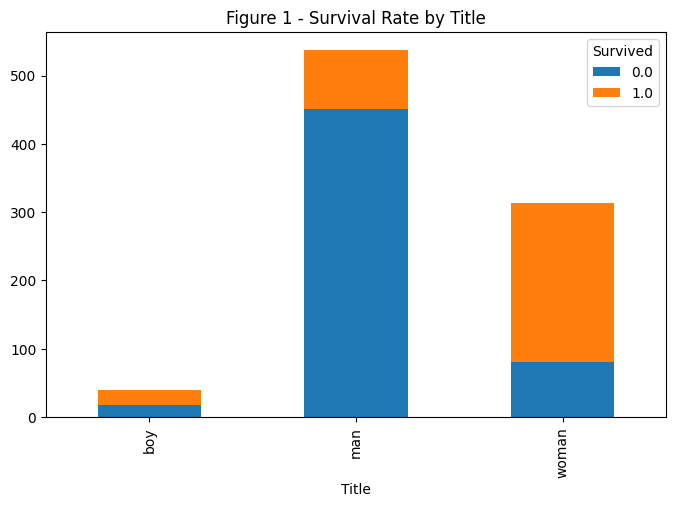

In [1110]:
df_plot = master.groupby(['Survived', 'Title']).size().reset_index().pivot(columns='Survived', index='Title', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Figure 1 - Survival Rate by Title')
# plt.savefig("Figure 1.png")

In [1111]:
woman_boy_survival_rate = (len(master.query('PassengerId<=891 and (Title == "woman" or Title == "boy") and Survived == 1')) 
 / len(master.query('PassengerId<=891 and (Title == "woman" or Title == "boy")'))) * 100
woman_boy_survival_rate
print(f"The percentage of women and boys in the training data who survived: {woman_boy_survival_rate:0.1f}%")

The percentage of women and boys in the training data who survived: 72.3%


In [1112]:
man_survival_rate = (len(master.query('PassengerId<=891 and Title == "man" and Survived == 1')) 
 / len(master.query('PassengerId<=891 and Title == "man"'))) * 100
man_survival_rate
print(f"The percentage of men in the training data who survived: {man_survival_rate:0.1f}%")

The percentage of men in the training data who survived: 16.0%


Text(0.5, 1.0, 'Figure 2 - Survival by Passenger Class')

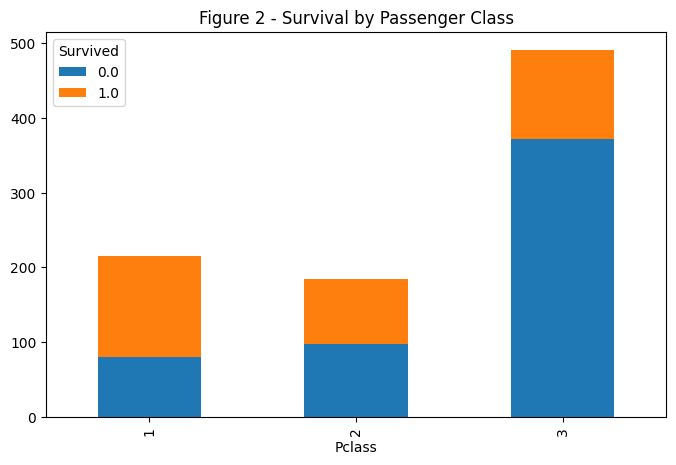

In [1113]:
df_plot = master.groupby(['Survived', 'Pclass']).size().reset_index().pivot(columns='Survived', index='Pclass', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Figure 2 - Survival by Passenger Class')
# plt.savefig("Figure 2.png")

In [1114]:
first_survival_rate = (len(master.query('PassengerId<=891 and Pclass == 1 and Survived == 1')) 
 / len(master.query('PassengerId<=891 and Pclass == 1'))) * 100
print(f"The percentage of First-Class passengers in the training data who survived: {first_survival_rate:0.1f}%")

The percentage of First-Class passengers in the training data who survived: 63.0%


In [1115]:
second_survival_rate = (len(master.query('PassengerId<=891 and Pclass == 2 and Survived == 1')) 
 / len(master.query('PassengerId<=891 and Pclass == 2'))) * 100
print(f"The percentage of Second-Class passengers in the training data who survived: {second_survival_rate:0.1f}%")


The percentage of Second-Class passengers in the training data who survived: 47.3%


In [1116]:
third_survival_rate = (len(master.query('PassengerId<=891 and Pclass == 3 and Survived == 1')) 
 / len(master.query('PassengerId<=891 and Pclass == 3'))) * 100
print(f"The percentage of Second-Class passengers in the training data who survived: {third_survival_rate:0.1f}%")

The percentage of Second-Class passengers in the training data who survived: 24.2%


In [1117]:
master['FamilySize'] = master['SibSp'] + master['Parch'] + 1

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Figure 3 - Family Size and Survival')

<Figure size 1600x800 with 0 Axes>

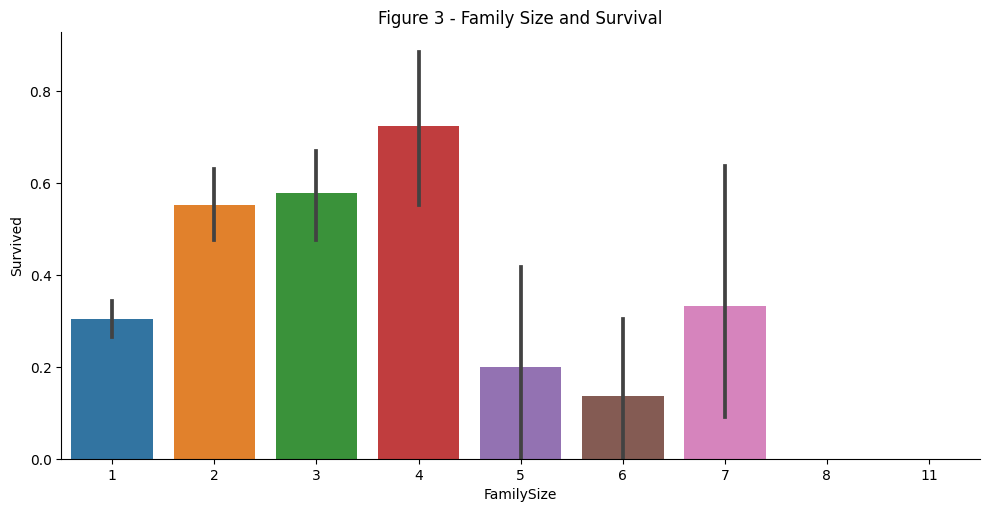

In [1118]:
plt.figure(figsize=(16,8))
sns.catplot(x='FamilySize', y='Survived', data=master, kind='bar', aspect=2)
plt.title('Figure 3 - Family Size and Survival')
# plt.savefig("Figure 3.png")

Text(0.5, 1.0, 'Figure 4 - Survival by Point of Embarkation')

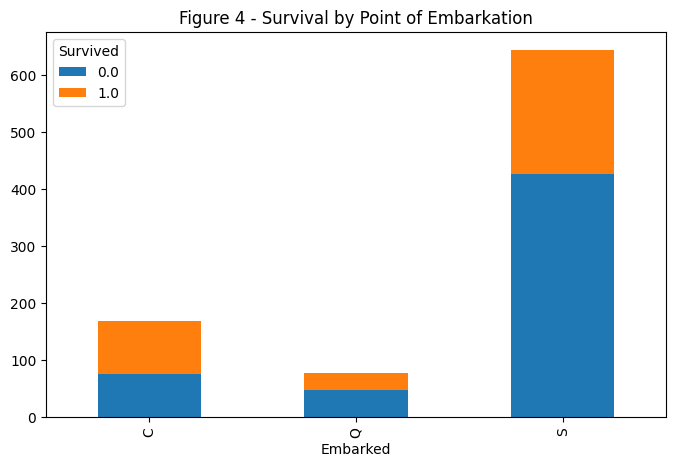

In [1119]:
df_plot = master.groupby(['Survived', 'Embarked']).size().reset_index().pivot(columns='Survived', index='Embarked', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Figure 4 - Survival by Point of Embarkation')
# plt.savefig("Figure 2.4.png")

In [1120]:
C_rate = (len(master.query('PassengerId<=891 and Embarked == "C"')) 
 / len(master.query('PassengerId<=891'))) * 100
print(f"The percentage of passengers in the training data who embarked at Cherbourg: {C_rate:0.1f}%")

C_survival_rate = (len(master.query('PassengerId<=891 and Embarked == "C" and Survived == 1')) 
 / len(master.query('PassengerId<=891 and Embarked == "C"'))) * 100
print(f"The percentage of Cherbourg passengers in the training data who survived: {C_survival_rate:0.1f}%")

The percentage of passengers in the training data who embarked at Cherbourg: 18.9%
The percentage of Cherbourg passengers in the training data who survived: 55.4%


In [1121]:
Q_rate = (len(master.query('PassengerId<=891 and Embarked == "Q"')) 
 / len(master.query('PassengerId<=891'))) * 100
print(f"The percentage of passengers in the training data who embarked at Queenstown: {Q_rate:0.1f}%")

Q_survival_rate = (len(master.query('PassengerId<=891 and Embarked == "Q" and Survived == 1')) 
 / len(master.query('PassengerId<=891 and Embarked == "Q"'))) * 100
print(f"The percentage of Queenstown passengers in the training data who survived: {Q_survival_rate:0.1f}%")

The percentage of passengers in the training data who embarked at Queenstown: 8.6%
The percentage of Queenstown passengers in the training data who survived: 39.0%


In [1122]:
S_rate = (len(master.query('PassengerId<=891 and Embarked == "S"')) 
 / len(master.query('PassengerId<=891'))) * 100
print(f"The percentage of passengers in the training data who embarked at Southampton: {S_rate:0.1f}%")

S_survival_rate = (len(master.query('PassengerId<=891 and Embarked == "S" and Survived == 1')) 
 / len(master.query('PassengerId<=891 and Embarked == "S"'))) * 100
print(f"The percentage of Southampton passengers in the training data who survived: {S_survival_rate:0.1f}%")

The percentage of passengers in the training data who embarked at Southampton: 72.3%
The percentage of Southampton passengers in the training data who survived: 33.7%


In [1123]:
# Table 1
master.loc[master['Ticket'] == '110413']

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilySize
262,263,1.0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S,0.0,man,3
558,559,0.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S,1.0,woman,3
585,586,0.0,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S,1.0,woman,3


In [1124]:
master['PartySize'] = master['Ticket'].value_counts()[master.loc[:,'Ticket']].values

In [1125]:
#一人当たりの運賃
master['FareAdj'] = master['Fare'] / master['PartySize']

Text(0.5, 1.0, 'Figure 5 - Survival, Age and Fare')

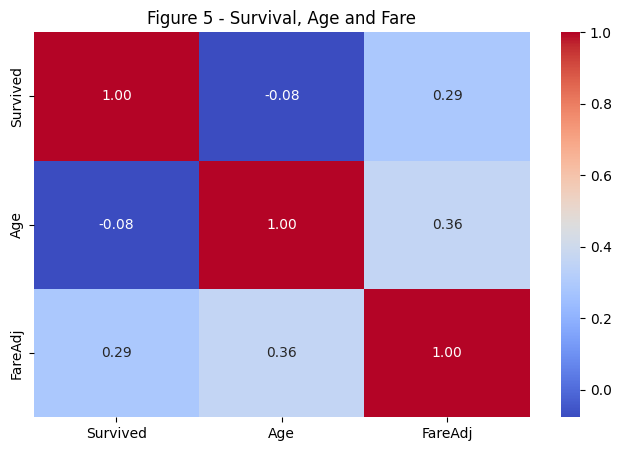

In [1126]:
plt.figure(figsize=(8,5))
sns.heatmap(master[['Survived', 'Age', 'FareAdj']].corr(), annot=True, fmt='0.2f', cmap='coolwarm')
plt.title('Figure 5 - Survival, Age and Fare')
#  plt.savefig("Figure 5.png")

Text(0.5, 1.0, 'Figure 6 - Distribution of Ages')

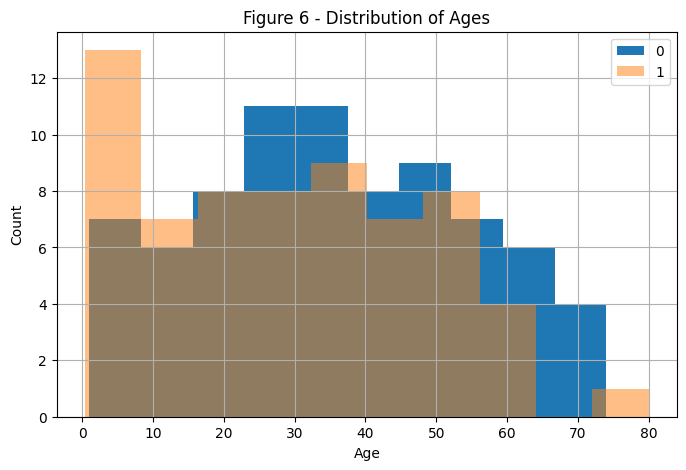

In [1127]:
plot_df = master.groupby(['Survived', 'Age']).size().reset_index()
plot_df.loc[plot_df['Survived'] == 0]['Age'].hist(bins=10, figsize=(8,5))
plot_df.loc[plot_df['Survived'] == 1]['Age'].hist(bins=10, figsize=(8,5), alpha=0.5)
plt.legend(['0','1'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title('Figure 6 - Distribution of Ages')
# plt.savefig("Figure 6.png")

Text(0.5, 1.0, 'Figure 7 - Distribution of Fares')

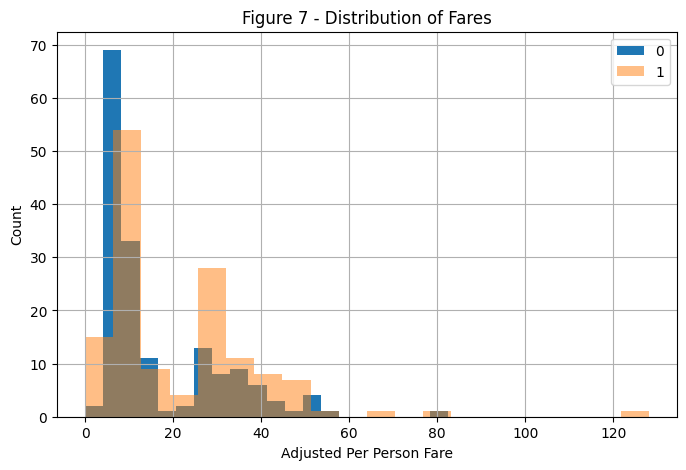

In [1128]:
plot_df = master.groupby(['Survived', 'FareAdj']).size().reset_index()
plot_df.loc[plot_df['Survived'] == 0]['FareAdj'].hist(bins=20, figsize=(8,5))
plot_df.loc[plot_df['Survived'] == 1]['FareAdj'].hist(bins=20, figsize=(8,5), alpha=0.5)
plt.legend(['0','1'])
plt.xlabel("Adjusted Per Person Fare")
plt.ylabel("Count")
plt.title('Figure 7 - Distribution of Fares')
# plt.savefig("Figure 7.png")

In [1129]:
master.isnull().sum()

PassengerId       0
Perished        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
Title             0
FamilySize        0
PartySize         0
FareAdj           1
dtype: int64

In [1130]:
all_ages = master.loc[master['Age'] > 0].copy()
no_ages = master.loc[pd.isnull(master['Age'])].copy()


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [1131]:
X_train = pd.get_dummies(all_ages[['Title', 'Pclass', 'SibSp', 'Parch']])
y_train = all_ages['Age']
X_test = pd.get_dummies(no_ages[['Title', 'Pclass', 'SibSp', 'Parch']])

In [1132]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=RANDOM_STATE)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [1133]:
missing_ages = pd.DataFrame(dtr.predict(X_test), index=X_test.index, columns=['Age'])

In [1134]:
master['Age'] = master['Age'].combine_first(missing_ages['Age'])

In [1135]:
master.isnull().sum()

PassengerId       0
Perished        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
Title             0
FamilySize        0
PartySize         0
FareAdj           1
dtype: int64

In [1136]:
all_fares = master.loc[master['Fare'] > 0].copy()
no_fares = master.loc[pd.isnull(master['Fare'])].copy()

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [1137]:
X_train = pd.get_dummies(all_fares[['Title', 'Pclass', 'Embarked']])
y_train = all_fares['Fare']
X_test = pd.get_dummies(no_fares[['Title', 'Pclass', 'Embarked']])

In [1138]:
X_test = X_test.reindex(columns=X_train.columns)
X_test = X_test.fillna(0)
dtr = DecisionTreeRegressor(random_state=RANDOM_STATE)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [1139]:
missing_fares = pd.DataFrame(dtr.predict(X_test), index=X_test.index, columns=['Fare'])
master['Fare'] = master['Fare'].combine_first(missing_fares['Fare'])

In [1140]:
master['FareAdj'] = master['Fare'] / master['PartySize']

In [1141]:
master.isnull().sum()

PassengerId       0
Perished        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Survived        418
Title             0
FamilySize        0
PartySize         0
FareAdj           0
dtype: int64

In [1142]:
X_men = master[(master['PassengerId'] <= 891) & (master['Title'] == 'man')]

/tmp/ipykernel_536/1450091634.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_men.loc[X_men['Survived']==0.0]['Age'], shade=True, color='r', ax=axes[0,0], legend=False)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_536/1450091634.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_men.loc[X_men['Survived']==1.0]['Age'], shade=True, color='g', ax=axes[0,0], legend=False)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

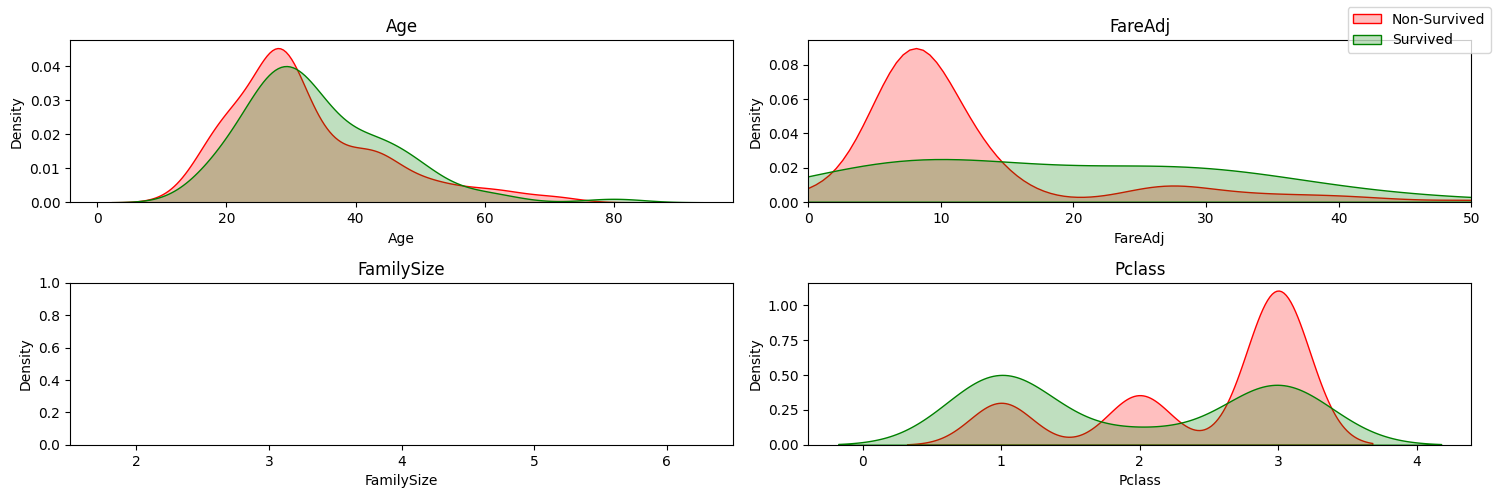

In [1143]:
fig, axes = plt.subplots(2,2, figsize=(15,5))
sns.kdeplot(X_men.loc[X_men['Survived']==0.0]['Age'], shade=True, color='r', ax=axes[0,0], legend=False)
sns.kdeplot(X_men.loc[X_men['Survived']==1.0]['Age'], shade=True, color='g', ax=axes[0,0], legend=False)
axes[0,0].set_title('Age')
sns.kdeplot(X_men.loc[X_men['Survived']==0.0]['FareAdj'], shade=True, color='r', ax=axes[0,1], legend=False)
sns.kdeplot(X_men.loc[X_men['Survived']==1.0]['FareAdj'], shade=True, color='g', ax=axes[0,1], legend=False)
axes[0,1].set_title('FareAdj')
axes[0,1].set_xlim(0,50)
sns.kdeplot(X_men.loc[X_men['Survived']==0.0]['FamilySize'], shade=True, color='r', ax=axes[1,0], bw=0, legend=False)
sns.kdeplot(X_men.loc[X_men['Survived']==1.0]['FamilySize'], shade=True, color='g', ax=axes[1,0], bw=0, legend=False)
axes[1,0].set_title('FamilySize')
axes[1,0].set_xlim(1.5,6.5)
sns.kdeplot(X_men.loc[X_men['Survived']==0.0]['Pclass'], shade=True, color='r', ax=axes[1,1], legend=False)
sns.kdeplot(X_men.loc[X_men['Survived']==1.0]['Pclass'], shade=True, color='g', ax=axes[1,1], legend=False)
axes[1,1].set_title('Pclass')
fig.legend(['Non-Survived','Survived'])
fig.tight_layout()
# plt.savefig("Figure 8.png")

In [1144]:
y = X_men['Survived']
x1 = X_men['FareAdj']/10
x2 = (X_men['FamilySize'])+(X_men['Age']/70)
Pclass = X_men['Pclass']
X_men_2feats = pd.concat([y.astype(int),x1,x2,Pclass], axis=1)
X_men_2feats.columns = ['Survived', 'x1', 'x2', 'Pclass']
X_men_2feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  537 non-null    int64  
 1   x1        537 non-null    float64
 2   x2        537 non-null    float64
 3   Pclass    537 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 21.0 KB


Text(0.5, 0, 'x1=Adjusted Fare/10')

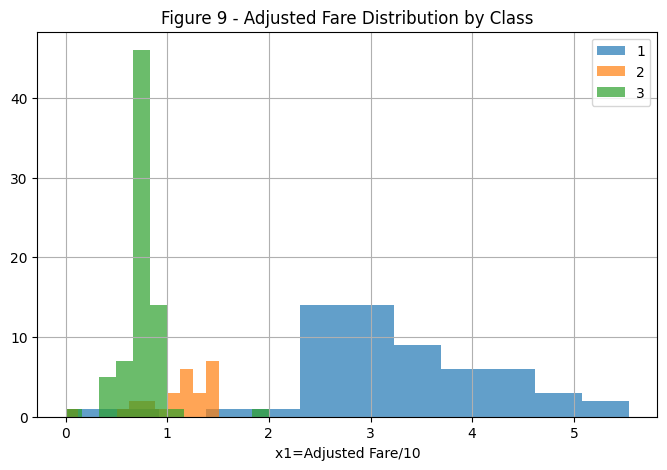

In [1145]:
plt.figure(figsize=(8,5))
plt_df = X_men_2feats.query('x1<6 and x2<6').groupby(['Pclass', 'x1']).size().reset_index()
plt_df.loc[plt_df['Pclass'] == 1]['x1'].hist(bins=12, alpha=0.7)
plt_df.loc[plt_df['Pclass'] == 2]['x1'].hist(bins=12, alpha=0.7)
plt_df.loc[plt_df['Pclass'] == 3]['x1'].hist(bins=12, alpha=0.7)
plt.legend([1,2,3])
plt.title('Figure 9 - Adjusted Fare Distribution by Class')
plt.xlabel('x1=Adjusted Fare/10')
# plt.savefig("Figure 9.png")

Text(0.5, 1.0, 'Figure 10 - Survival Patterns of Adult Males')

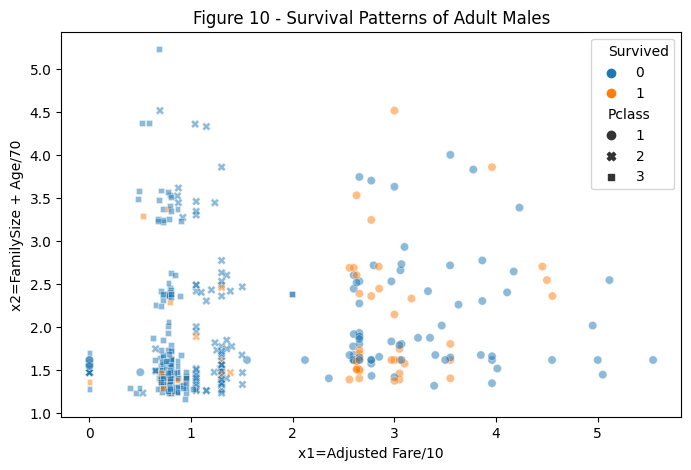

In [1146]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='x1', y='x2', hue='Survived', style='Pclass', data=X_men_2feats.query('x1<6 and x2<6'), alpha=0.5)
plt.xlabel('x1=Adjusted Fare/10')
plt.ylabel('x2=FamilySize + Age/70')
plt.title('Figure 10 - Survival Patterns of Adult Males')
# plt.savefig("Figure 10.png")  

In [1147]:
x1s = np.linspace(0,5,100)
x2s = np.linspace(1,3,100)
x1 = np.repeat(x1s, 100)
x2 = [j for i in range(100) for j in x2s]
g = pd.DataFrame([x1,x2]).T
g.columns = ['x1','x2']
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', max_depth=5, learning_rate=0.1, gamma=0.1, colsample_bytree=1, min_child_weight=1, random_state=RANDOM_STATE)
history = xgb.fit(X_men_2feats[['x1','x2']], X_men_2feats['Survived'], eval_metric='error')
pred = xgb.predict(g[['x1','x2']])
print(f'The predicted survival rate for adult males is only {(sum(pred)/10000)*100}%, so they are going to be hard to find!')

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


The predicted survival rate for adult males is only 7.42%, so they are going to be hard to find!


In [1148]:
g['Survived'] = pred

Text(0.5, 1.0, 'Figure 11 - XGBoost Predicted Patterns of Adult Male Survival')

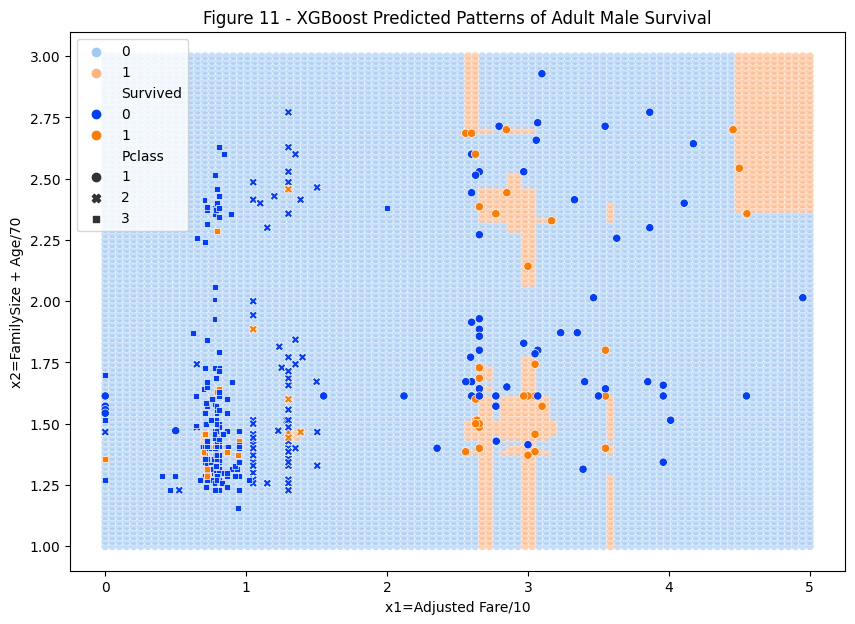

In [1149]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='x1', y='x2', hue='Survived', palette='pastel', data=g, alpha=0.6)
sns.scatterplot(x='x1', y='x2', style='Pclass', hue='Survived', palette='bright',data=X_men_2feats.query('x1<5 and x2<3'))
plt.legend()
plt.xlabel('x1=Adjusted Fare/10')
plt.ylabel('x2=FamilySize + Age/70')
plt.title('Figure 11 - XGBoost Predicted Patterns of Adult Male Survival')
# plt.savefig("Figure 11.png")

In [1150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_men_2feats[['x1','x2']], X_men_2feats['Survived'], test_size=.3, random_state=42)

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


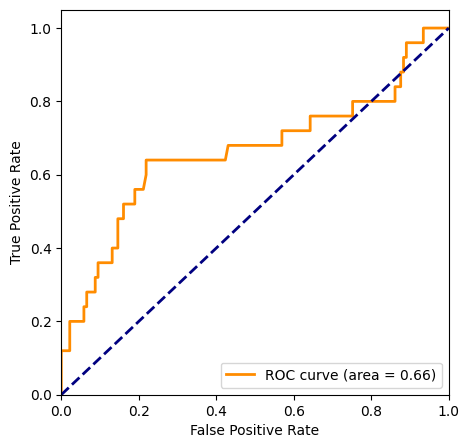

In [1151]:
xgb = XGBClassifier(objective='binary:logistic', max_depth=5, learning_rate=0.1, gamma=0.1, colsample_bytree=1, min_child_weight=1, random_state=RANDOM_STATE)
history = xgb.fit(X_train, y_train, eval_metric='error')
y_score = xgb.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, auc, accuracy_score, average_precision_score, precision_recall_curve, PrecisionRecallDisplay, classification_report
# Calculate the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Figure 3.5 - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("Figure 12.png")

In [1152]:
y_pred = np.array(list(map(lambda x: 1 if x>0.50 else 0, y_score)))
# print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       137
           1       0.40      0.24      0.30        25

    accuracy                           0.83       162
   macro avg       0.64      0.59      0.60       162
weighted avg       0.80      0.83      0.81       162



In [1153]:
y_pred = np.array(list(map(lambda x: 1 if x>0.75 else 0, y_score)))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       137
           1       1.00      0.12      0.21        25

    accuracy                           0.86       162
   macro avg       0.93      0.56      0.57       162
weighted avg       0.88      0.86      0.82       162



In [1154]:
y_pred = np.array(list(map(lambda x: 1 if x>0.90 else 0, y_score)))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       137
           1       0.00      0.00      0.00        25

    accuracy                           0.85       162
   macro avg       0.42      0.50      0.46       162
weighted avg       0.72      0.85      0.77       162



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1155]:
y_pred = np.array(list(map(lambda x: 1 if x>0.92 else 0, y_score)))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       137
           1       0.00      0.00      0.00        25

    accuracy                           0.85       162
   macro avg       0.42      0.50      0.46       162
weighted avg       0.72      0.85      0.77       162



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1156]:
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.40


Text(0.5, 1.0, 'Figure 13 - 2-class Precision-Recall curve: AP=0.40')

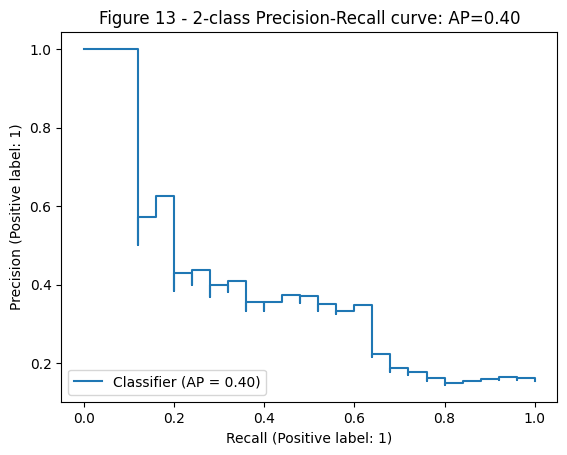

In [1157]:
disp = PrecisionRecallDisplay.from_predictions(y_test, y_score)
disp.ax_.set_title('Figure 13 - 2-class Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))
# disp.ax_

In [1158]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, X_men_2feats[['x1','x2']], X_men_2feats['Survived'], cv=10)
print("Scores:")
print(scores)

Scores:
[0.7962963  0.77777778 0.81481481 0.77777778 0.81481481 0.81481481
 0.87037037 0.83018868 0.8490566  0.86792453]


In [1159]:
print(f'Mean cross validation score: {scores.mean()*100:0.2f}%')

Mean cross validation score: 82.14%


In [1160]:
#男性
dataB = master[(master['PassengerId'] <= 891) & (master['Title'] == 'man')]
dataC = master[(master['PassengerId'] > 891) & (master['Title'] == 'man')]
dataTrain = pd.concat([dataB['Survived'].astype(int), dataB['FareAdj']/10, dataB['FamilySize']+(dataB['Age']/70)], axis=1)
dataTrain.columns=['Survived', 'x1', 'x2']
dataTest = pd.concat([dataC['Survived'], dataC['FareAdj']/10, dataC['FamilySize']+(dataC['Age']/70), dataC['PassengerId']], axis=1)
dataTest.columns=['Survived', 'x1', 'x2', 'PassengerId']

In [1161]:
xgb = XGBClassifier(objective='binary:logistic', max_depth=5, learning_rate=0.1, gamma=0.1, n_estimators=500, random_state=RANDOM_STATE, verbosity=1)
history = xgb.fit(dataTrain[['x1','x2']], dataTrain['Survived'], eval_metric='error')
y_score = xgb.predict_proba(dataTest[['x1','x2']])[:,1]
y_pred = pd.DataFrame(np.array(list(map(lambda x: 1 if x>0.90 else 0, y_score))), index=dataTest.index)
y_pred.columns=['Survived']

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


In [1162]:
sum(y_pred['Survived'])

1

In [ ]:
# 男性モデルの100 trials Cross-Validation (trainデータのみ使用)
trials = 100
cv_scores = []
men_live_counts = []  # 生存予測した男性の人数を記録

# trainデータのみを使用
train_data = master[master['PassengerId'] <= 891].copy()

for i in range(trials):
    # ランダムに訓練データと検証データを分割 (trainデータ内で)
    train_ids = np.random.choice(range(1, 892), 800, replace=False)
    val_ids = [x for x in range(1, 892) if x not in train_ids]
    
    # 訓練データとテストデータを作成（trainデータのみ）
    dataB_cv = train_data[train_data['PassengerId'].isin(train_ids) & (train_data['Title'] == 'man')]
    dataC_cv = train_data[train_data['PassengerId'].isin(val_ids) & (train_data['Title'] == 'man')]
    
    dataTrain_cv = pd.concat([dataB_cv['Survived'].astype(int), dataB_cv['FareAdj']/10, dataB_cv['FamilySize']+(dataB_cv['Age']/70)], axis=1)
    dataTrain_cv.columns = ['Survived', 'x1', 'x2']
    
    dataTest_cv = pd.concat([dataC_cv['Survived'].astype(int), dataC_cv['FareAdj']/10, dataC_cv['FamilySize']+(dataC_cv['Age']/70)], axis=1)
    dataTest_cv.columns = ['Survived', 'x1', 'x2']
    
    # XGBoostモデルを訓練
    xgb_cv = XGBClassifier(
        objective='binary:logistic',
        max_depth=5,
        learning_rate=0.1,
        gamma=0.1,
        n_estimators=500,
        random_state=RANDOM_STATE,
        verbosity=0
    )
    xgb_cv.fit(dataTrain_cv[['x1','x2']], dataTrain_cv['Survived'])
    
    # 閾値 > 0.90 で予測
    y_score_cv = xgb_cv.predict_proba(dataTest_cv[['x1','x2']])[:,1]
    y_pred_cv = np.array(list(map(lambda x: 1 if x>0.90 else 0, y_score_cv)))
    
    # 生存予測した男性の人数をカウント
    men_live_count = sum(y_pred_cv)
    men_live_counts.append(men_live_count)
    
    # 全乗客の検証セットで精度計算（trainデータのみ）
    val_all = train_data[train_data['PassengerId'].isin(val_ids)]
    y_true_all = val_all['Survived'].values
    
    # デフォルト予測: 女性=生存、男性=死亡
    pred_all = np.where(val_all['Sex'] == 'female', 1, 0)
    
    # 男性の予測を上書き
    men_mask = val_all['Title'] == 'man'
    pred_all[men_mask] = y_pred_cv[:len(pred_all[men_mask])]
    
    # 精度計算
    accuracy = 1 - np.mean(np.abs(pred_all - y_true_all))
    cv_scores.append(accuracy)

# 詳細な統計情報を出力
print(f'{trials} trials Cross-Validation Results (trainデータのみ使用):')
print(f'  Mean:  {np.mean(cv_scores):.6f}')
print(f'  Std:   {np.std(cv_scores):.6f}')
print(f'  Min:   {np.min(cv_scores):.6f}')
print(f'  Max:   {np.max(cv_scores):.6f}')
print()
print(f'生存予測した男性の人数分布（{trials}トライアル中）:')
from collections import Counter
count_distribution = Counter(men_live_counts)
for num_men in sorted(count_distribution.keys()):
    print(f'  {num_men}人: {count_distribution[num_men]}回')


In [ ]:
master['Surname'] = master['Name'].apply(lambda x: x.split(',')[0])

In [ ]:
import re
master['TicketX'] = master['Ticket'].apply(lambda x: re.sub('.$', 'X', x))
x = master[['Surname', 'Pclass', 'TicketX', 'Fare', 'Embarked']].to_string(header=False, index=False, index_names=False).split('\n')
vals = ['-'.join(i.split()) for i in x]
master['GroupId'] = vals

In [ ]:
master.loc[master['Title'] == 'man', 'GroupId'] = 'NoGroup'

In [ ]:
master['GroupId'].isnull().sum()

0

In [ ]:
master.loc[master['Name'].apply(lambda x: 'Needs' in x)]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilySize,PartySize,FareAdj,Surname,TicketX,GroupId
774,775,0.0,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0,NaN,S,1.0,woman,5,2,11.5,Hocking,2910X,Hocking-2-2910X-23.00000-S
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,NaN,S,NaN,woman,2,1,7.0,Wilkes,36327X,Wilkes-3-36327X-7.00000-S


In [ ]:
master.loc[892, 'GroupId'] = master.loc[774, 'GroupId']
master.loc[master.GroupId=='Richards-2-2910X-18.75000-S','GroupId'] = 'Hocking-2-2910X-23.00000-S'
master.loc[529,'GroupId'] = 'Hocking-2-2910X-23.00000-S'
master.loc[master.GroupId=='Hocking-2-2910X-23.00000-S']

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilySize,PartySize,FareAdj,Surname,TicketX,GroupId
407,408,0.0,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.75,NaN,S,1.0,boy,3,3,6.25,Richards,2910X,Hocking-2-2910X-23.00000-S
437,438,0.0,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.00,2,3,29106,18.75,NaN,S,1.0,woman,6,3,6.25,Richards,2910X,Hocking-2-2910X-23.00000-S
529,530,1.0,2,"Hocking, Mr. Richard George",male,23.00,2,1,29104,11.50,NaN,S,0.0,man,4,1,11.50,Hocking,2910X,Hocking-2-2910X-23.00000-S
774,775,0.0,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.00,1,3,29105,23.00,NaN,S,1.0,woman,5,2,11.50,Hocking,2910X,Hocking-2-2910X-23.00000-S
831,832,0.0,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.75,NaN,S,1.0,boy,3,3,6.25,Richards,2910X,Hocking-2-2910X-23.00000-S
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S,NaN,woman,2,1,7.00,Wilkes,36327X,Hocking-2-2910X-23.00000-S
943,944,NaN,2,"Hocking, Miss. Ellen Nellie""""",female,20.00,2,1,29105,23.00,NaN,S,NaN,woman,4,2,11.50,Hocking,2910X,Hocking-2-2910X-23.00000-S


In [ ]:
master['GroupFreq'] = master['GroupId'].value_counts()[master.loc[:,'GroupId']].values
master.loc[master['GroupFreq'] == 1, 'GroupId'] = 'NoGroup'
master['GroupFreq'] = master['GroupId'].value_counts()[master.loc[:,'GroupId']].values

In [ ]:
master['GroupId'].nunique()-1 # We don't count NoGroup

79

In [ ]:
x = master[['Pclass', 'TicketX', 'Fare', 'Embarked']].to_string(header=False, index=False, index_names=False).split('\n')
master['TicketId'] = ['-'.join(i.split()) for i in x]

In [ ]:
idx = master.query('Title != "man" and GroupId == "NoGroup"').index
print("Current number of single women and boys: ", len(idx))

Current number of single women and boys:  307


In [ ]:
for i in idx:
    z = master['GroupId'][master['TicketId'] == master['TicketId'][i]]
    q = [j for j in z if j != "NoGroup"]
    if len(q) > 0:
        master.loc[i,'GroupId'] = q[0]
print("Number of nannies and other female relatives found and added to their repsective families: ",
      len(idx) - len(master.query('Title != "man" and GroupId == "NoGroup"').index) )

Number of nannies and other female relatives found and added to their repsective families:  11


In [ ]:
master['GroupSurvival'] = master.groupby('GroupId')['Survived'].mean()[master.loc[:,'GroupId']].values
master['GroupSurvival'].value_counts()

GroupSurvival
0.337875    1077
1.000000     129
0.000000      76
0.800000       7
0.750000       6
0.500000       5
Name: count, dtype: int64

In [ ]:
master.query('GroupSurvival == "NaN"')['Name'].count()

0

In [ ]:
idx = master.query('GroupSurvival == "NaN" and Pclass == 3').index
master.loc[idx, 'GroupSurvival'] = 0

In [ ]:
idx = master.query('GroupSurvival == "NaN" and Pclass == 1').index
master.loc[idx, 'GroupSurvival'] = 1
master['GroupSurvival'].value_counts()

GroupSurvival
0.337875    1077
1.000000     129
0.000000      76
0.800000       7
0.750000       6
0.500000       5
Name: count, dtype: int64

In [ ]:
master['Predict'] = 0 
master.loc[master.Sex =="female", 'Predict'] = 1
idx = master.query('Title == "woman" and GroupSurvival == 0').index
master.loc[idx, 'Predict'] = 0
idx = master.query('Title == "boy" and GroupSurvival == 1').index
master.loc[idx, 'Predict'] = 1

In [ ]:
master.query('Sex == "male" and Predict == 1 and PassengerId > 891')['Name']

955         Ryerson, Master. John Borie
980         Wells, Master. Ralph Lester
1052     Touma, Master. Georges Youssef
1085      Drew, Master. Marshall Brines
1087    Spedden, Master. Robert Douglas
1198          Aks, Master. Philip Frank
1283      Abbott, Master. Eugene Joseph
1308           Peter, Master. Michael J
Name: Name, dtype: object

In [ ]:
master.query('Sex == "female" and Predict == 0 and PassengerId > 891')['Name']

909                          Ilmakangas, Miss. Ida Livija
924     Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"
928                                    Cacic, Miss. Manda
1023                        Lefebre, Mrs. Frank (Frances)
1031                          Goodwin, Miss. Jessie Allis
1079                                      Sage, Miss. Ada
1140            Khalil, Mrs. Betros (Zahie Maria" Elias)"
1171                               Oreskovic, Miss. Jelka
1175                          Rosblom, Miss. Salli Helena
1256                       Sage, Mrs. John (Annie Bullen)
1258         Riihivouri, Miss. Susanna Juhantytar Sanni""
Name: Name, dtype: object

In [ ]:
submission = master.loc[891:, ['PassengerId', 'Predict']]
submission.reset_index(drop=True, inplace=True)
submission['Perished'] = 1 - submission['Predict']
submission = submission[['PassengerId', 'Perished']]
#submission.to_csv('2020-03-30_WCG.csv', index=False)

In [ ]:
# Groups in the training data who either all survived or all perished
WCGtrain = master.query('PassengerId<=891 and (GroupSurvival==0 or GroupSurvival==1)')
# Groups in test data who either all survived or all perished
WCGtest = master.query('PassengerId>891 and (GroupSurvival==0 or GroupSurvival==1)')
# Single Women in the trainign set
dataB = master.query('PassengerId<=891 and Title=="woman" and FamilySize==1')
# Single Women in the test set
dataC = master.query('PassengerId>891 and Title=="woman" and FamilySize==1')
# Drop women from the test set who belonged to groups that either entirely survived or entirely perished
Cset = set(dataC.index)
WCGset = set(WCGtest.index)
drop_list = list(Cset & WCGset)
#drop_list
dataC.drop(drop_list, inplace=True, axis=0)

/tmp/ipykernel_536/4010463409.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC.drop(drop_list, inplace=True, axis=0)


In [ ]:
# Groups in the training data who either all survived or all perished
WCGtrain = master.query('PassengerId<=891 and (GroupSurvival==0 or GroupSurvival==1)')
# Groups in test data who either all survived or all perished
WCGtest = master.query('PassengerId>891 and (GroupSurvival==0 or GroupSurvival==1)')
# Single Women in the trainign set
dataB = master.query('PassengerId<=891 and Title=="woman" and FamilySize==1')
# Single Women in the test set
dataC = master.query('PassengerId>891 and Title=="woman" and FamilySize==1')
# Drop women from the test set who belonged to groups that either entirely survived or entirely perished
Cset = set(dataC.index)
WCGset = set(WCGtest.index)
drop_list = list(Cset & WCGset)
#drop_list
dataC.drop(drop_list, inplace=True, axis=0)

/tmp/ipykernel_536/4010463409.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC.drop(drop_list, inplace=True, axis=0)


In [ ]:


# dataTrain作成
y = dataB['Survived']
x1 = dataB['FareAdj']/10
x2 = dataB['Age']/15
PassId = dataB['PassengerId']
Pclass = dataB['Pclass']


dataTrain = pd.concat([y, x1, x2, PassId, Pclass], axis=1)
dataTrain.columns = ['Survived', 'x1', 'x2', 'PassengerId', 'Pclass']

# dataTest作成
y = dataC['Survived']
x1 = dataC['FareAdj']/10
x2 = dataC['Age']/15
PassId = dataC['PassengerId']
Pclass = dataC['Pclass']



dataTest = pd.concat([y, x1, x2, PassId, Pclass], axis=1)
dataTest.columns = ['Survived', 'x1', 'x2', 'PassengerId', 'Pclass']

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = LogisticRegression(random_state=RANDOM_STATE, max_iter=200)
clf2 = RandomForestClassifier(random_state=RANDOM_STATE, max_depth=5)
clf3 = SVC(probability=True, random_state=RANDOM_STATE)
clf4 = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
clf5 = KNeighborsClassifier(n_neighbors=5)

clf6 = XGBClassifier(
    objective="binary:logistic",
    eval_metric="error",
    max_depth=5,
    learning_rate=0.1,
    gamma=0.1,
    colsample_bytree=1,
    min_child_weight=1,
    n_estimators=500,
    verbosity=0
)
from lightgbm import LGBMClassifier

clf7 = LGBMClassifier(
    objective="binary",
    metric="binary_logloss",
    learning_rate=0.1,   # = eta
    n_estimators=500,
    num_leaves=32        # ≈ XGB max_depth=5
)



eclf_hard = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3), ('dtc', clf4), ('knn', clf5)], voting='hard', weights=[0.6,0.6,0.6,0.9,1])
eclf_soft = VotingClassifier(estimators=[('lr', clf1),  ('svc', clf3), ('dtc', clf4), ('knn', clf5)], voting='soft', weights=[0.6,0.6,0.9,1])

classifiers = ['Logistic Regression', 'Random Forest', 'SVM', 'DecisionTree', 'KNN', 'XGBoost', 'HardVoteEnsemble', 'SoftVoteEnsemble']

In [ ]:
print('\n5-fold cross validation:')
feature_cols = ['x1', 'x2', 'Pclass']

for clf, label in zip([clf1, clf2, clf3, clf4, clf5,clf6, clf7, eclf_hard, eclf_soft], classifiers):
    scores = model_selection.cross_val_score(
        clf,
        dataTrain[feature_cols],
        dataTrain['Survived'],
        cv=5,
        scoring='accuracy'
    )
    print(f"\tAccuracy: {scores.mean():.3f} ± {scores.std():.3f} [{label}]")

from sklearn.model_selection import StratifiedKFold, cross_val_score

# # StratifiedKFoldを定義
# skf = StratifiedKFold(n_splits =5, shuffle=True, random_state=42)

# print('\n5-fold Stratified cross validation:')
# for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf_hard, eclf_soft], classifiers):
#     scores = cross_val_score(
#         clf,
#         dataTrain[['x1', 'x2', 'Pclass']],
#         dataTrain['Survived'],
#         cv=skf,
#         scoring='accuracy'
#     )
#     print(f"\tAccuracy: {scores.mean():.2f} [{label}]")


from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# # RepeatedStratifiedKFoldを定義
# rskf = RepeatedStratifiedKFold(
#     n_splits=5,     # 5分割
#     n_repeats=3,    # 3回繰り返し（計15回の検証）
#     random_state=42
# )

# print('\n5-fold × 3-repeat Stratified cross validation:')
# for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf_hard, eclf_soft], classifiers):
#     scores = cross_val_score(
#         clf,
#         dataTrain[['x1', 'x2', 'Pclass']],
#         dataTrain['Survived'],
#         cv=rskf,
#         scoring='accuracy'
#     )
#     print(f"\tAccuracy: {scores.mean():.3f} ± {scores.std():.3f} [{label}]")

print('\n5-fold cross validation:')
feature_cols = ['x1', 'x2', 'Pclass']

for clf, label in zip([clf1, clf2, clf3, clf4, clf5,clf6, eclf_hard, eclf_soft], classifiers):
    scores = model_selection.cross_val_score(
        clf,
        dataTrain[feature_cols],
        dataTrain['Survived'],
        cv=5,
        scoring='accuracy'
    )
    print(f"\t{label}:")
    print(f"\t  Mean: {scores.mean():.6f}")
    print(f"\t  Std:  {scores.std():.6f}")
    print(f"\t  Min:  {scores.min():.6f}")
    print(f"\t  Max:  {scores.max():.6f}")
    print(f"\t  Scores: {scores}")
    print()


5-fold cross validation:
	Accuracy: 0.778 ± 0.018 [Logistic Regression]
	Accuracy: 0.786 ± 0.079 [Random Forest]
	Accuracy: 0.786 ± 0.018 [SVM]
	Accuracy: 0.818 ± 0.062 [DecisionTree]
	Accuracy: 0.834 ± 0.060 [KNN]
	Accuracy: 0.755 ± 0.096 [XGBoost]
[LightGBM] [Info] Number of positive: 79, number of negative: 21
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.790000 -> initscore=1.324925
[LightGBM] [Info] Start training from score 1.324925
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [ ]:
#特徴量
feature_cols = ['x1', 'x2', 'Pclass']
eclf_hard.fit(dataTrain[feature_cols], dataTrain['Survived'])

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=200,
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('dtc',
                              DecisionTreeClassifier(max_depth=2,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 weights=[0.6, 0.6, 0.6, 0.9, 1])

In [ ]:
# y_score = eclf_soft.predict_proba(dataTest[['x1','x2','Pclass']])[:,1]
# # Apply a threshold function to tune the predictions 
# y_pred = pd.DataFrame(np.array(list(map(lambda x: 0 if x<=0.30 else 1, y_score))), index=dataTest.index)
# predict_proba()の代わりにpredict()を使用
#特徴量
feature_cols = ['x1', 'x2', 'Pclass']
y_pred = eclf_hard.predict(dataTest[feature_cols])
# DataFrameに変換
y_pred = pd.DataFrame(y_pred, index=dataTest.index, columns=['Survived'])
y_pred.columns=['Survived']

In [ ]:
dataTest['Survived'] = y_pred['Survived']
fatal_idx = dataTest.loc[dataTest.Survived == 0].index
master2 = master.copy()
master2.loc[fatal_idx,'Predict'] = 0
fatal_ids = master2.loc[fatal_idx,'PassengerId'].values
submission2 = submission.copy()
submission2.loc[submission2['PassengerId'].isin(fatal_ids)]

,PassengerId,Perished
19,911,0
36,928,0
87,979,0
138,1030,0
199,1091,0
268,1160,0


In [ ]:
submission2.loc[submission2['PassengerId'].isin(fatal_ids),'Survived'] = 0
#submission2.to_csv('2020-03-28_Ensemble.csv', index=False)

In [ ]:
#submission2["Perished"].head()
submission["Perished"].head()


0    1
1    0
2    1
3    1
4    0
Name: Perished, dtype: int64

In [ ]:
# 提出ファイル作成（Perished版）
output_path = "../output/submission.csv"

# Survivedを反転してPerishedに変換
submission_perished = submission.copy()

submission_perished = submission_perished[['PassengerId', 'Perished']]

# 
import os
os.makedirs("../output", exist_ok=True)

# CSV保存
submission_perished.to_csv(output_path, index=False)

print(f"提出ファイル: {output_path}")
print(f"\n予測分布:")
print(f"  Survived (0): {(submission_perished['Perished'] == 0).sum()} ({(submission_perished['Perished'] == 0).sum() / len(submission_perished) * 100:.1f}%)")
print(f"  Perished (1): {(submission_perished['Perished'] == 1).sum()} ({(submission_perished['Perished'] == 1).sum() / len(submission_perished) * 100:.1f}%)")

print(f"\n最初の10行:")
print(submission_perished.head(10))

print(f"\n最後の10行:")
print(submission_perished.tail(10))

提出ファイル: ../output/submission.csv

予測分布:
  Survived (0): 149 (35.6%)
  Perished (1): 269 (64.4%)

最初の10行:
   PassengerId  Perished
0          892         1
1          893         0
2          894         1
3          895         1
4          896         0
5          897         1
6          898         0
7          899         1
8          900         0
9          901         1

最後の10行:
     PassengerId  Perished
408         1300         0
409         1301         0
410         1302         0
411         1303         0
412         1304         0
413         1305         1
414         1306         0
415         1307         1
416         1308         1
417         1309         0
